In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler, power_transform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor


#library for error detection in regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error

#libraries for regularisation
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

#SCORE CHECKERS-Classifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score


#Model building libraries
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier


#EDA libraries
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler, power_transform

#library for EDA
from scipy.stats import zscore

#Library for saving data
import pickle

#model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#library for GridSearchCV 
from sklearn.model_selection import GridSearchCV
#Library for saving data
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


# Data Description

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [4]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

The database has 25 columns

Both categorical and numerical data are present

**Meaning of the columns**

1. `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification 
2. `country_long` (text): longer form of the country designation
3. `name` (text): name or title of the power plant, generally in Romanized form
4. `gppd_idnr` (text): 10 or 12 character identifier for the power plant
5.  `capacity_mw` (number): electrical generating capacity in megawatts
6. `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
7. `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
8. `primary_fuel` (text): energy source used in primary electricity generation or export
9. `other_fuel1` (text): energy source used in electricity generation or export
10. `other_fuel2` (text): energy source used in electricity generation or export
11. `other_fuel3` (text): energy source used in electricity generation or export
12. `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
13. `owner` (text): majority shareholder of the power plant, generally in Romanized form
14. `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
15. `url` (text): web document corresponding to the `source` field
16. `geolocation_source` (text): attribution for geolocation information
17. `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
18. `year_of_capacity_data` (number): year the capacity information was reported
19. `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
20. `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
21. `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
22. `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
23. `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
24. `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
25. `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
26. `generation_data_source` (text): attribution for the reported generation information
27. `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
28. `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014
29. `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015
30. `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016
31. `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017
32. 'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
33. `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014
34. `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
35. `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
36. `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017

# Statistical data analysis

In [5]:
df.describe(include='all')

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
count,907,907,907,907,907.000000,861.000000,861.000000,907,198,1,...,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,449,0.0
unique,1,1,907,907,NaN,NaN,NaN,8,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,IND,India,SVPL,IND0000327,NaN,NaN,NaN,Coal,Oil,Oil,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Central Electricity Authority,NaN
freq,907,907,1,1,NaN,NaN,NaN,258,195,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,449,NaN
mean,NaN,NaN,NaN,NaN,326.223755,21.197918,77.464907,NaN,NaN,NaN,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,590.085456,6.239612,4.939316,NaN,NaN,NaN,...,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,8.168900,68.644700,NaN,NaN,NaN,...,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,16.725000,16.773900,74.256200,NaN,NaN,NaN,...,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,59.200000,21.780000,76.719500,NaN,NaN,NaN,...,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,385.250000,25.512400,79.440800,NaN,NaN,NaN,...,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN,NaN


**Observations**

1.Number of rows/data present is 908

2.Large number of null values present

3.Only one unique value present in country,country_long,other_fuel2,generation_data_source, so will drop the columns

# FEATURE ENGINEERING

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

**1.renaming columns**

In [7]:
df.rename(columns = {'country':'country_code'}, inplace = True)
df.rename(columns = {'country_long':'longerform_country'}, inplace = True)
df.rename(columns = {'name':'name_of_powerplant'}, inplace = True)
df.rename(columns = {'gppd_idnr':'characteridentifier_of_power plant'}, inplace = True)
df.rename(columns = {'capacity_mw':'electrical_generation_Megawatts'}, inplace = True)
df.rename(columns = {'wepp_id':'unique plant identifier'}, inplace = True)
df.rename(columns = {'generation_gwh_2013':'electricity generation_gigawatt_2013'}, inplace = True)
df.rename(columns = {'generation_gwh_2014':'electricity generation_gigawatt_2014'}, inplace = True)
df.rename(columns = {'generation_gwh_2015':'electricity generation_gigawatt_2015'}, inplace = True)
df.rename(columns = {'generation_gwh_2016':'electricity generation_gigawatt_2016'}, inplace = True)
df.rename(columns = {'generation_gwh_2017':'electricity generation_gigawatt_2017'}, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country_code                          907 non-null    object 
 1   longerform_country                    907 non-null    object 
 2   name_of_powerplant                    907 non-null    object 
 3   characteridentifier_of_power plant    907 non-null    object 
 4   electrical_generation_Megawatts       907 non-null    float64
 5   latitude                              861 non-null    float64
 6   longitude                             861 non-null    float64
 7   primary_fuel                          907 non-null    object 
 8   other_fuel1                           198 non-null    object 
 9   other_fuel2                           1 non-null      object 
 10  other_fuel3                           0 non-null      float64
 11  commissioning_year 

**2.Dropping unnecessary columns**

In [9]:
df.nunique()

country_code                              1
longerform_country                        1
name_of_powerplant                      907
characteridentifier_of_power plant      907
electrical_generation_Megawatts         361
latitude                                836
longitude                               827
primary_fuel                              8
other_fuel1                               3
other_fuel2                               1
other_fuel3                               0
commissioning_year                       73
owner                                   280
source                                  191
url                                     304
geolocation_source                        3
unique plant identifier                   0
year_of_capacity_data                     1
electricity generation_gigawatt_2013      0
electricity generation_gigawatt_2014    371
electricity generation_gigawatt_2015    396
electricity generation_gigawatt_2016    403
electricity generation_gigawatt_

Columns with **all unique** or **single or zero unique values** which needs to be dropped are:
1. country_code
2. longerform_country
3. name_of_powerplant
4. characteridentifier_of_power plant
5. other_fuel2
6. other_fuel3
7. unique plant identifier
8. year_of_capacity_data
9. generation_data_source
10. estimated_generation_gwh

In [10]:
drop_columns=df[{'country_code', 'longerform_country', 'name_of_powerplant', 'characteridentifier_of_power plant', 'other_fuel2', 'other_fuel3','unique plant identifier','year_of_capacity_data','generation_data_source','estimated_generation_gwh'}]
df.drop(drop_columns,axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   electrical_generation_Megawatts       907 non-null    float64
 1   latitude                              861 non-null    float64
 2   longitude                             861 non-null    float64
 3   primary_fuel                          907 non-null    object 
 4   other_fuel1                           198 non-null    object 
 5   commissioning_year                    527 non-null    float64
 6   owner                                 342 non-null    object 
 7   source                                907 non-null    object 
 8   url                                   907 non-null    object 
 9   geolocation_source                    888 non-null    object 
 10  electricity generation_gigawatt_2013  0 non-null      float64
 11  electricity generat

# Graphical data analysis

**1.Analysing the categorical data with the label**

In [11]:
#finding categorical datas
df.select_dtypes(exclude=["number"]).columns

Index(['primary_fuel', 'other_fuel1', 'owner', 'source', 'url',
       'geolocation_source'],
      dtype='object')

In [12]:
df.nunique()

electrical_generation_Megawatts         361
latitude                                836
longitude                               827
primary_fuel                              8
other_fuel1                               3
commissioning_year                       73
owner                                   280
source                                  191
url                                     304
geolocation_source                        3
electricity generation_gigawatt_2013      0
electricity generation_gigawatt_2014    371
electricity generation_gigawatt_2015    396
electricity generation_gigawatt_2016    403
electricity generation_gigawatt_2017    408
generation_gwh_2018                     410
generation_gwh_2019                       0
dtype: int64

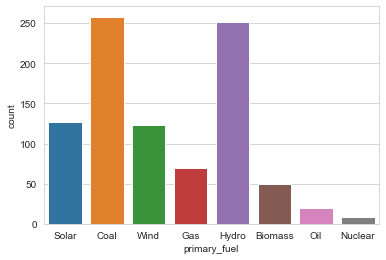

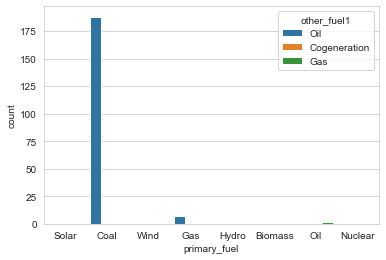

<Figure size 432x216 with 0 Axes>

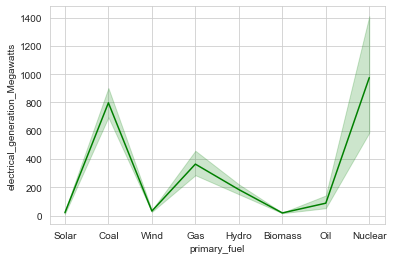

In [13]:
sns.set_style("whitegrid")
sns.countplot(x="primary_fuel", data=df)
plt.show()

#countplot with hue label
sns.countplot(x="primary_fuel", hue='other_fuel1',data = df)
plt.figure(figsize=(6,3))
plt.show()

sns.lineplot(x="primary_fuel",y='electrical_generation_Megawatts',data=df, color='green')
plt.show()


**OBSERVATION**
1. Coal and Hydro is the maximum used
2. Oil is the maximum used other than the primary source
3. Maximum power generation is for Coal and oil

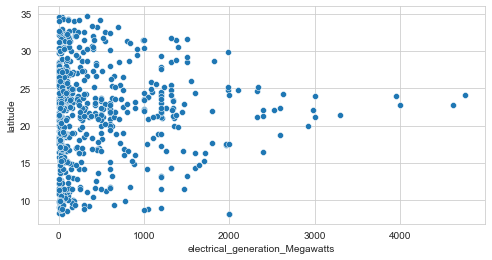

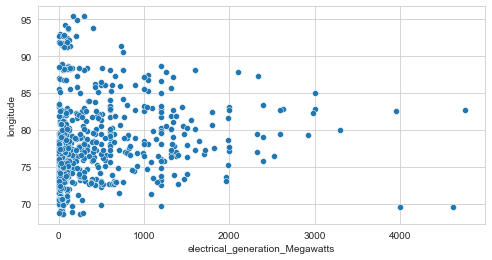

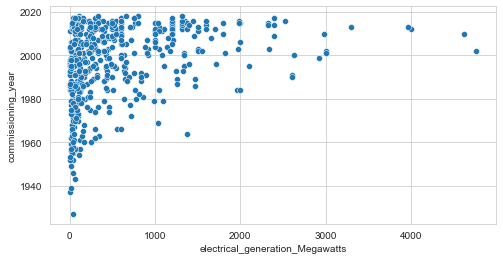

In [14]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='electrical_generation_Megawatts',y='latitude',data=df)
plt.show()

plt.figure(figsize=(8,4))
sns.scatterplot(x='electrical_generation_Megawatts',y='longitude',data=df)
plt.show()

plt.figure(figsize=(8,4))
sns.scatterplot(x='electrical_generation_Megawatts',y='commissioning_year',data=df)
plt.show()



**OBSERVATION**
1. Electricity generation peaks beteen 20 and 25 degree latitude and 73-87 degree longitude
2. Nearer the year of creation, maximum electricity generation occurs. Between 2000-2020 has maximum production


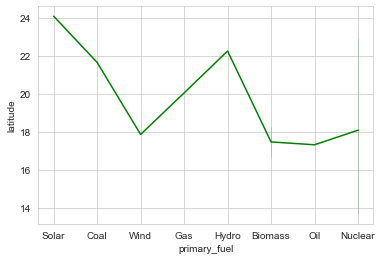

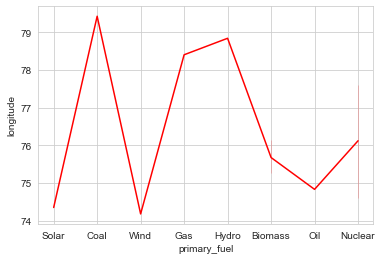

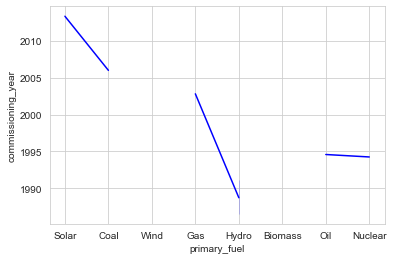

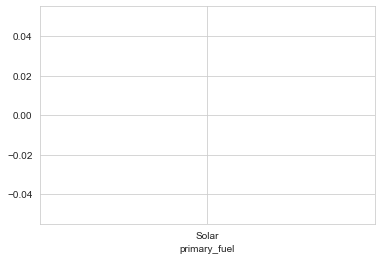

In [15]:
sns.lineplot(x="primary_fuel",y='latitude',data=df, color='green')
plt.show()

sns.lineplot(x="primary_fuel",y='longitude',data=df, color='red')
plt.show()

sns.lineplot(x="primary_fuel",y='commissioning_year',data=df, color='blue')
plt.show()

sns.lineplot(x="primary_fuel",y='electricity generation_gigawatt_2013',data=df, color='pink')
plt.show()

**Observation**
1. Solar power,coal and hydro power generation are seen in tropical areas and the rest in the temperate regions
2. Hydro power generation was predominant in 1990 and solar in 2015
3. Electricity generation in 2013 primary was nuclear and coal

**2.Analysing numerical data with label**

In [16]:
#finding numerical datas
df.select_dtypes(include=["number"]).columns

Index(['electrical_generation_Megawatts', 'latitude', 'longitude',
       'commissioning_year', 'electricity generation_gigawatt_2013',
       'electricity generation_gigawatt_2014',
       'electricity generation_gigawatt_2015',
       'electricity generation_gigawatt_2016',
       'electricity generation_gigawatt_2017', 'generation_gwh_2018',
       'generation_gwh_2019'],
      dtype='object')

In [17]:
num=df[{'latitude', 'longitude',
       'commissioning_year', 'electricity generation_gigawatt_2013',
       'electricity generation_gigawatt_2014',
       'electricity generation_gigawatt_2015',
       'electricity generation_gigawatt_2016',
       'electricity generation_gigawatt_2017'}]

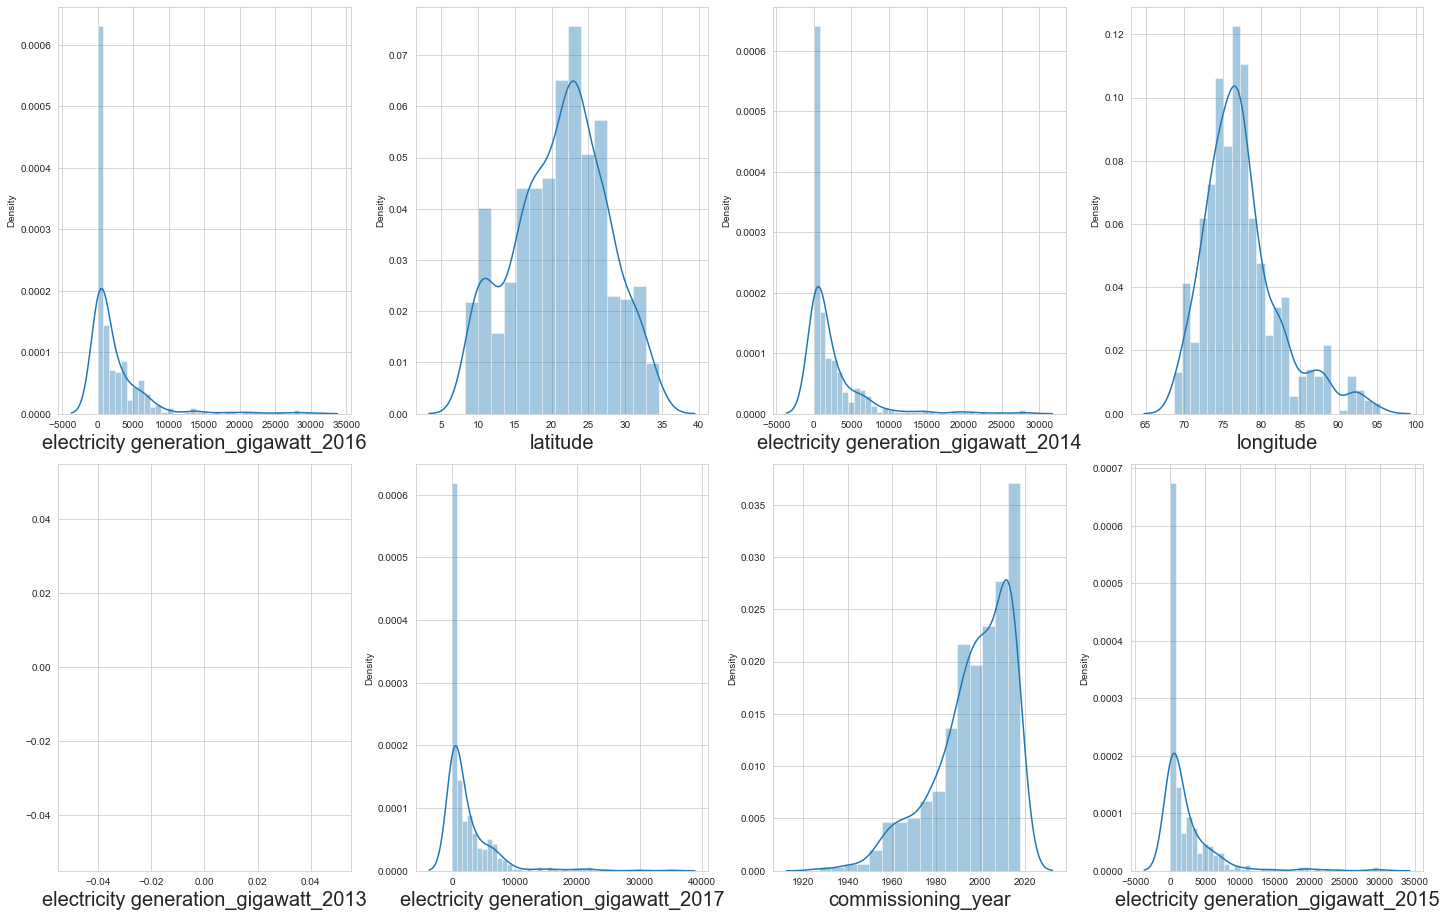

In [18]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in num:
    if plotnumber<=16:
       ax=plt.subplot(4,4,plotnumber)
       sns.distplot(num[column])         #distribution plot- we use for continous data
       plt.xlabel(column,fontsize=20)

    plotnumber+=1
plt.tight_layout()
plt.show()


**Observations:**

Highest value:
1. longitude is 78 and latitude is 22
2. generation_gwh_2017 is 3000,generation_gwh_2014 is 2200,generation_gwh_2013 is 2200,generation_gwh_2015 is 2200, generation_gwh_2016 is 2200

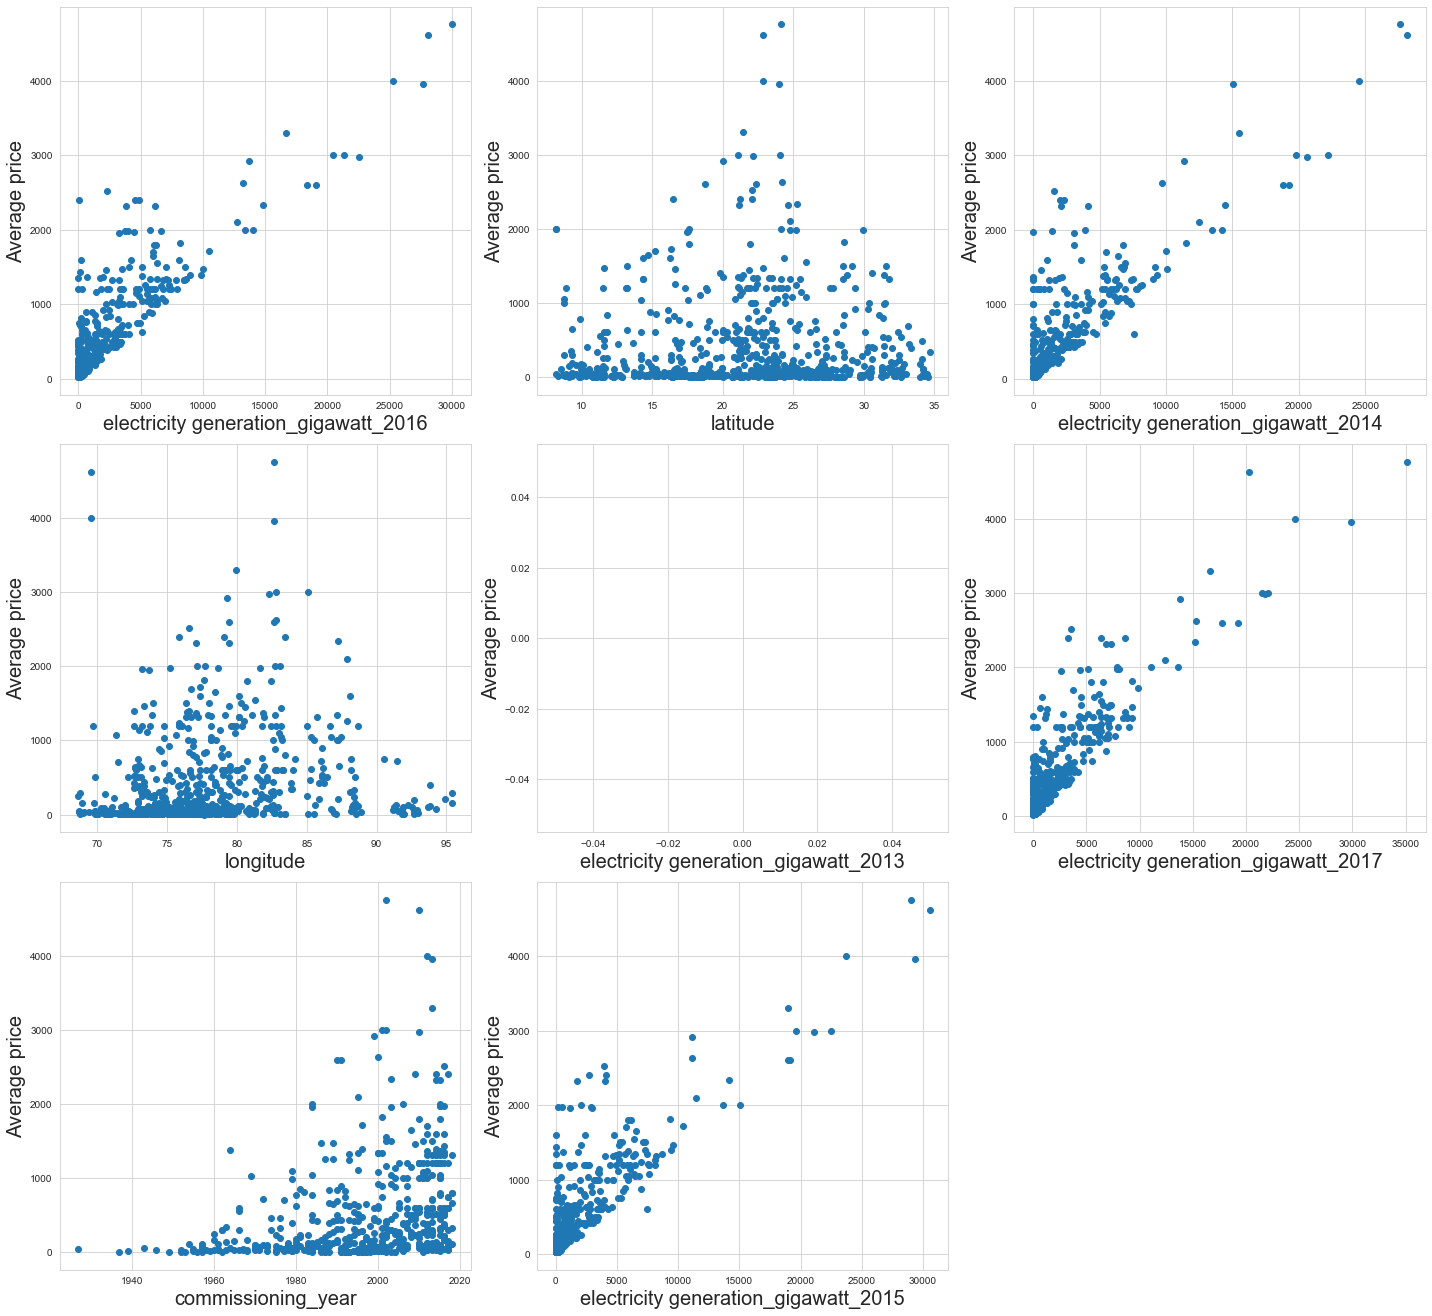

In [19]:
#Analysing the relationship between numerical features and Label

y_table=df['electrical_generation_Megawatts']

#visualising the relationship- scatter plot 
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in num:
    if plotnumber<=15:
        X=plt.subplot(5,3,plotnumber)
        plt.scatter(num[column],y_table)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Average price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

**OBSERVATION**
1. Most of the latitude between 70 and 87 degree are having capacity between 0 and 1000MW
2. Most of the latitude between 70 and 87 degree are having capacity between 0 and 1000MW
3. The capacity increases as generation_gwh_2017 increases. The 2013,2014,2015 and 2016 is similar to this

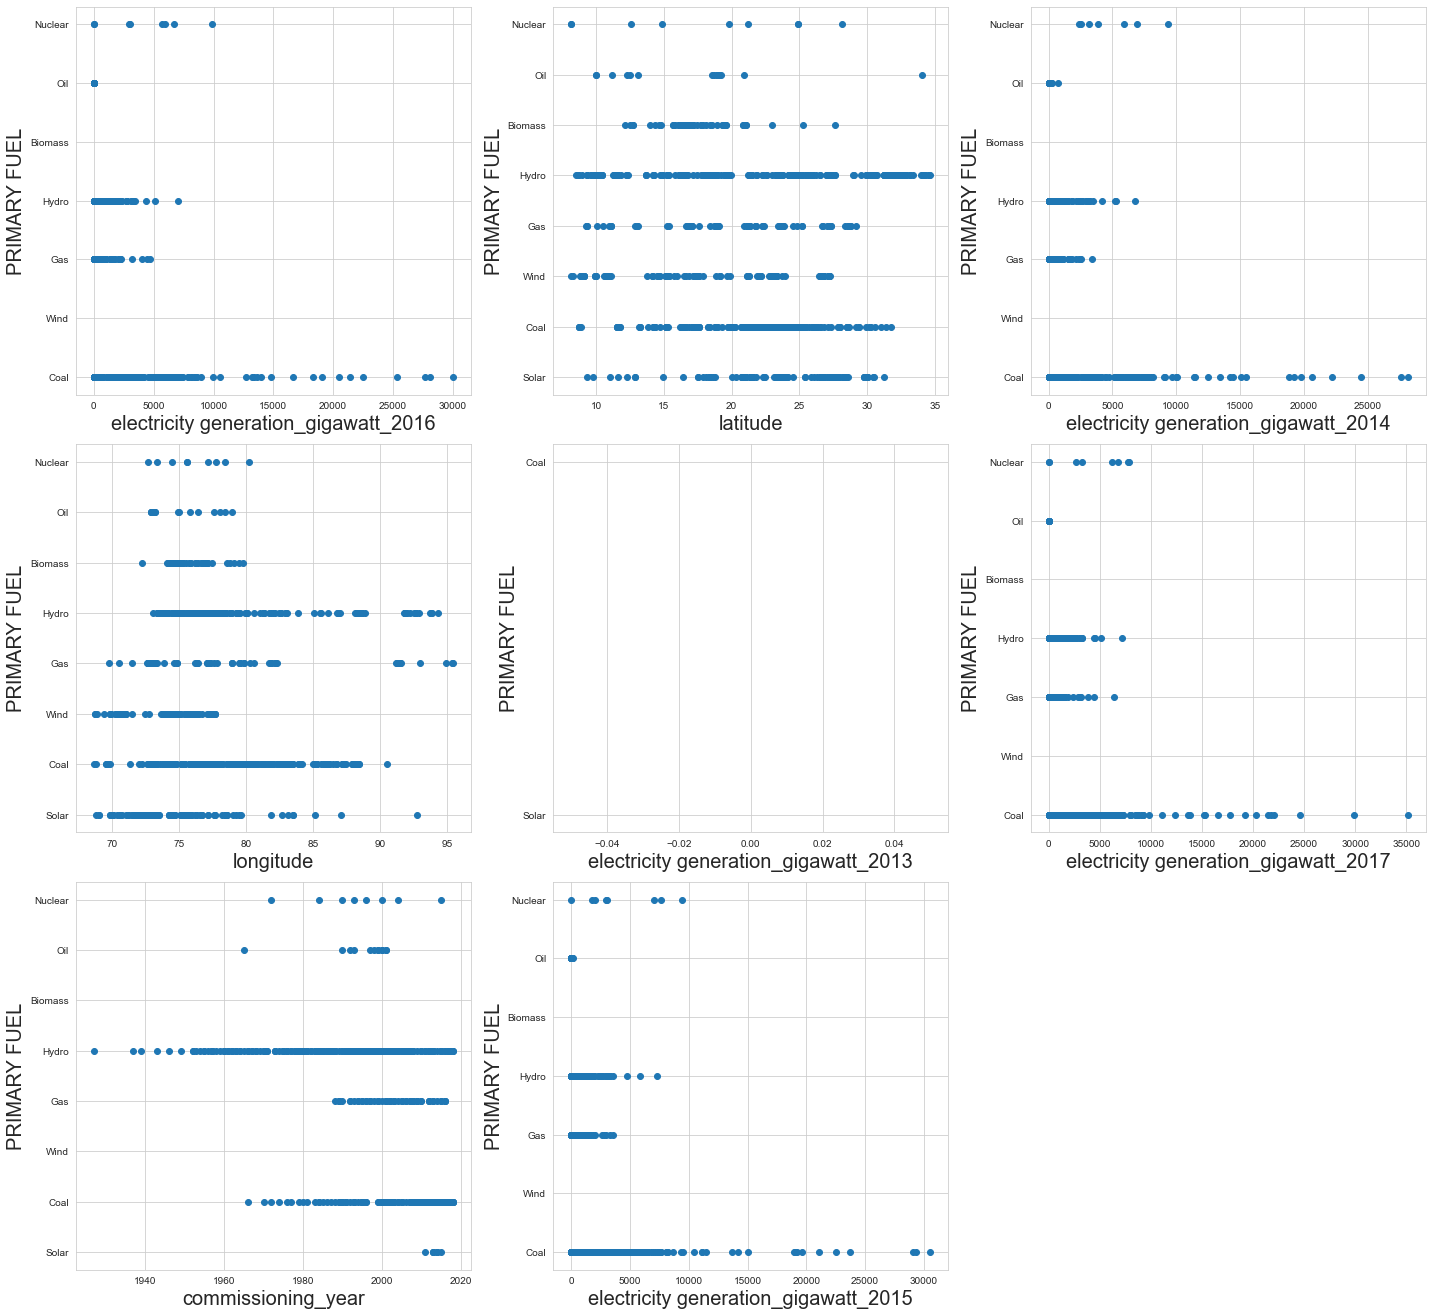

In [20]:

y_table=df['primary_fuel']

#visualising the relationship- scatter plot 
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in num:
    if plotnumber<=15:
        X=plt.subplot(5,3,plotnumber)
        plt.scatter(num[column],y_table)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('PRIMARY FUEL',fontsize=20)
    plotnumber+=1
plt.tight_layout()

**OBSERVATIONS:**
1. Maximum electricity generation is seen in 2017,2016,2015,2014 and 2013 is through coal
2. Gas,wind,oil and biomass is more towards temperate regions
3. Hydro power plants were the earliest commissioned and then coal.
4. Power generation between 80-95 degree longitude is not by nuclear,biomass,oil and wind. Even coal and solar is very less there. Hydro is predominant in these longitudes.

# EDA

**1.Null values**

In [21]:
#Checking null values
df.isnull().sum()

electrical_generation_Megawatts           0
latitude                                 46
longitude                                46
primary_fuel                              0
other_fuel1                             709
commissioning_year                      380
owner                                   565
source                                    0
url                                       0
geolocation_source                       19
electricity generation_gigawatt_2013    907
electricity generation_gigawatt_2014    509
electricity generation_gigawatt_2015    485
electricity generation_gigawatt_2016    473
electricity generation_gigawatt_2017    467
generation_gwh_2018                     459
generation_gwh_2019                     907
dtype: int64

In [23]:
#calculating percentage of null values
def missing_values(df, percentage):

    columns = df.columns
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})

    missing_drop = list(missing_value_df[missing_value_df.percent_missing>percentage].column_name)
    df = df.drop(missing_drop, axis=1)
    return missing_value_df

missing_values(df,80)

,column_name,percent_missing
electrical_generation_Megawatts,electrical_generation_Megawatts,0.000000
latitude,latitude,5.071665
longitude,longitude,5.071665
primary_fuel,primary_fuel,0.000000
other_fuel1,other_fuel1,78.169791
commissioning_year,commissioning_year,41.896362
owner,owner,62.293275
source,source,0.000000
url,url,0.000000
geolocation_source,geolocation_source,2.094818


1.Removing columns which have above 70% null values

In [24]:
df = df.drop(df.columns[df.apply(lambda col: col.isnull().sum()/len(df) > 0.70)], axis=1)

2.removing duplicate values


In [25]:
df.drop_duplicates(inplace=True)

3.Mean of columns which have numerical data and have null values

Numerical columns are capacity_mw', 'latitude', 'longitude', 'other_fuel3',
       , 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017',
       'estimated_generation_gwh'

In it null values are there in latitude,longitude,generation_gwh_2013, generation_gwh_2014, generation_gwh_2015,generation_gwh_2016, generation_gwh_2017

dealing with these null values by replacing it with mean

In [27]:
#df["other_fuel1"].fillna(df["other_fuel1"].mode()[0],inplace=True)
df["commissioning_year"].fillna(df["commissioning_year"].mode()[0],inplace=True)
df["owner"].fillna(df["owner"].mode()[0],inplace=True)
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0],inplace=True)

In [28]:
#Checking null values
df.isnull().sum()

electrical_generation_Megawatts           0
latitude                                  0
longitude                                 0
primary_fuel                              0
commissioning_year                        0
owner                                     0
source                                    0
url                                       0
geolocation_source                        0
electricity generation_gigawatt_2014    509
electricity generation_gigawatt_2015    485
electricity generation_gigawatt_2016    473
electricity generation_gigawatt_2017    467
generation_gwh_2018                     459
dtype: int64

**2.dealing outliers on numerical data**

In [29]:
#finding numerical datas
df.select_dtypes(include=["number"]).columns

Index(['electrical_generation_Megawatts', 'latitude', 'longitude',
       'commissioning_year', 'electricity generation_gigawatt_2014',
       'electricity generation_gigawatt_2015',
       'electricity generation_gigawatt_2016',
       'electricity generation_gigawatt_2017', 'generation_gwh_2018'],
      dtype='object')

There is outliers present in  as well as skewness in generation2017,2016,2014,2013 and 2015 which needs to be removed

In [31]:
#Using zscore
import numpy as np
from scipy.stats import zscore

z=np.abs(zscore(num))
threshold=3
df_new=df[(z<3).all(axis=1)]

print("columns before applying zscore: ",len(df))
print("columns after applying zscore: ",len(df_new))

columns before applying zscore:  907
columns after applying zscore:  0


In [32]:
df=df_new

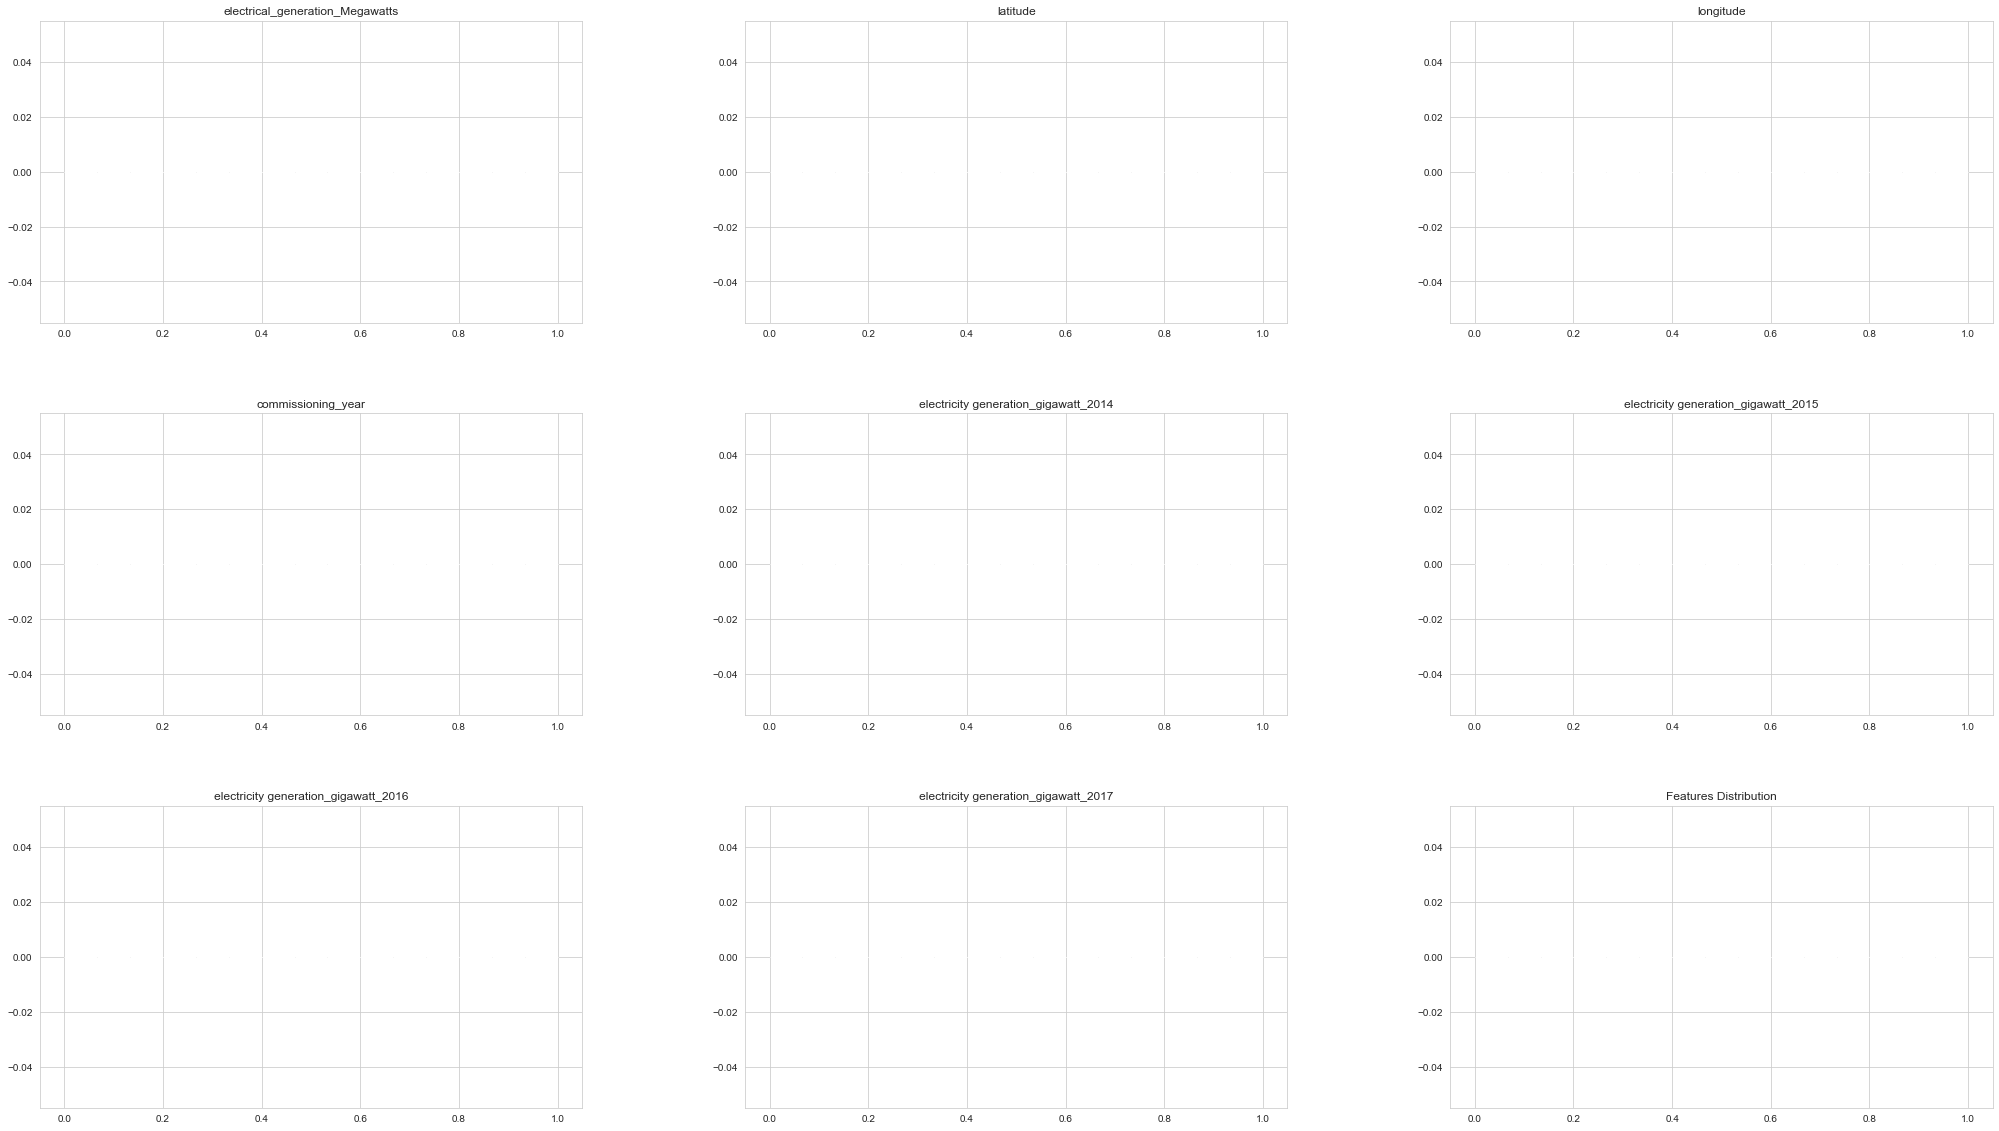

In [33]:
df.hist(figsize=(35,20),bins = 15)
plt.title("Features Distribution")
plt.show()

skewness is still present hence will remove it

**3.DEALING WITH SKEWNESS**

In [34]:
df.skew()

electrical_generation_Megawatts        NaN
latitude                               NaN
longitude                              NaN
primary_fuel                           NaN
commissioning_year                     NaN
owner                                  NaN
source                                 NaN
url                                    NaN
geolocation_source                     NaN
electricity generation_gigawatt_2014   NaN
electricity generation_gigawatt_2015   NaN
electricity generation_gigawatt_2016   NaN
electricity generation_gigawatt_2017   NaN
generation_gwh_2018                    NaN
dtype: float64

# Encoding

In [38]:
df.select_dtypes(exclude=["number"]).columns

Index(['primary_fuel', 'owner', 'source', 'url', 'geolocation_source'], dtype='object')

In [39]:
#label encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['owner']= label_encoder.fit_transform(df['owner'])
df['source']= label_encoder.fit_transform(df['source'])
df['url']= label_encoder.fit_transform(df['url'])
df['geolocation_source']= label_encoder.fit_transform(df['geolocation_source'])
df['primary_fuel']= label_encoder.fit_transform(df['primary_fuel'])

-----------------------------**PREDICTION FOR PRIMARY FUEL**-------------------------------------